In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

636

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [39]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aa464e3b066490e2012094930cddf430


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nemuro
Processing Record 2 of Set 1 | ponta do sol
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | klaksvik
Processing Record 7 of Set 1 | zhuzhou
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | san cristobal
Processing Record 10 of Set 1 | sunbury
Processing Record 11 of Set 1 | shar
Processing Record 12 of Set 1 | ulety
Processing Record 13 of Set 1 | nishihara
Processing Record 14 of Set 1 | ust-nera
Processing Record 15 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 16 of Set 1 | torbay
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | puerto baquerizo moreno
Processing Record 21 of Set 1 | atuona
Processing Record 22 of Se

Processing Record 35 of Set 4 | groningen
Processing Record 36 of Set 4 | bud
Processing Record 37 of Set 4 | acajutla
Processing Record 38 of Set 4 | rincon
Processing Record 39 of Set 4 | carnarvon
Processing Record 40 of Set 4 | spornoye
Processing Record 41 of Set 4 | coquimbo
Processing Record 42 of Set 4 | buxton
Processing Record 43 of Set 4 | port moresby
Processing Record 44 of Set 4 | dunedin
Processing Record 45 of Set 4 | victoria
Processing Record 46 of Set 4 | kushiro
Processing Record 47 of Set 4 | tiruvottiyur
City not found. Skipping...
Processing Record 48 of Set 4 | neuquen
Processing Record 49 of Set 4 | rock sound
Processing Record 50 of Set 4 | mount gambier
Processing Record 1 of Set 5 | kahului
Processing Record 2 of Set 5 | batagay
Processing Record 3 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 4 of Set 5 | kungurtug
Processing Record 5 of Set 5 | north bend
Processing Record 6 of Set 5 | simi
Processing Record 7 of Set 5 | san buenaventur

Processing Record 27 of Set 8 | sistranda
Processing Record 28 of Set 8 | touros
Processing Record 29 of Set 8 | lata
Processing Record 30 of Set 8 | mogoytuy
Processing Record 31 of Set 8 | troitskoye
Processing Record 32 of Set 8 | pundaguitan
Processing Record 33 of Set 8 | formoso do araguaia
City not found. Skipping...
Processing Record 34 of Set 8 | gat
Processing Record 35 of Set 8 | ca mau
Processing Record 36 of Set 8 | sao felix do xingu
Processing Record 37 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 38 of Set 8 | tupik
Processing Record 39 of Set 8 | fort nelson
Processing Record 40 of Set 8 | hervey bay
Processing Record 41 of Set 8 | mirnyy
Processing Record 42 of Set 8 | mehamn
Processing Record 43 of Set 8 | aklavik
Processing Record 44 of Set 8 | erenhot
Processing Record 45 of Set 8 | taltal
Processing Record 46 of Set 8 | beringovskiy
Processing Record 47 of Set 8 | atar
Processing Record 48 of Set 8 | tucumcari
Processing Record 49 of Set 8 

Processing Record 15 of Set 12 | viligili
City not found. Skipping...
Processing Record 16 of Set 12 | sungai siput utara
City not found. Skipping...
Processing Record 17 of Set 12 | atikokan
Processing Record 18 of Set 12 | yanan
City not found. Skipping...
Processing Record 19 of Set 12 | nabire
Processing Record 20 of Set 12 | yaan
Processing Record 21 of Set 12 | teya
Processing Record 22 of Set 12 | guozhen
Processing Record 23 of Set 12 | valencia
Processing Record 24 of Set 12 | robe
Processing Record 25 of Set 12 | acari
Processing Record 26 of Set 12 | shasta lake
Processing Record 27 of Set 12 | bolu
Processing Record 28 of Set 12 | agva
City not found. Skipping...
Processing Record 29 of Set 12 | kuryk
Processing Record 30 of Set 12 | pangnirtung
Processing Record 31 of Set 12 | saint-paul
Processing Record 32 of Set 12 | port blair
Processing Record 33 of Set 12 | tirur
Processing Record 34 of Set 12 | airai
Processing Record 35 of Set 12 | kiama
Processing Record 36 of Set

In [11]:
city_data

[{'City': 'Nemuro',
  'Lat': 43.32,
  'Lng': 145.57,
  'Max Temp': 59.5,
  'Humidity': 99,
  'Cloudiness': 98,
  'Wind Speed': 3.27,
  'Country': 'JP',
  'Date': '2020-07-08 16:33:38'},
 {'City': 'Ponta Do Sol',
  'Lat': 32.67,
  'Lng': -17.1,
  'Max Temp': 75,
  'Humidity': 67,
  'Cloudiness': 0,
  'Wind Speed': 2.46,
  'Country': 'PT',
  'Date': '2020-07-08 16:33:38'},
 {'City': 'Vaini',
  'Lat': -21.2,
  'Lng': -175.2,
  'Max Temp': 69.8,
  'Humidity': 94,
  'Cloudiness': 75,
  'Wind Speed': 4.7,
  'Country': 'TO',
  'Date': '2020-07-08 16:33:38'},
 {'City': 'Kapaa',
  'Lat': 22.08,
  'Lng': -159.32,
  'Max Temp': 78.8,
  'Humidity': 74,
  'Cloudiness': 90,
  'Wind Speed': 16.11,
  'Country': 'US',
  'Date': '2020-07-08 16:33:38'},
 {'City': 'Hobart',
  'Lat': -42.88,
  'Lng': 147.33,
  'Max Temp': 37.99,
  'Humidity': 93,
  'Cloudiness': 0,
  'Wind Speed': 5.82,
  'Country': 'AU',
  'Date': '2020-07-08 16:33:38'},
 {'City': 'Klaksvik',
  'Lat': 62.23,
  'Lng': -6.59,
  'Max Temp': 

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nemuro,43.32,145.57,59.50,99,98,3.27,JP,2020-07-08 16:33:38
1,Ponta Do Sol,32.67,-17.10,75.00,67,0,2.46,PT,2020-07-08 16:33:38
2,Vaini,-21.20,-175.20,69.80,94,75,4.70,TO,2020-07-08 16:33:38
3,Kapaa,22.08,-159.32,78.80,74,90,16.11,US,2020-07-08 16:33:38
4,Hobart,-42.88,147.33,37.99,93,0,5.82,AU,2020-07-08 16:33:38
5,Klaksvik,62.23,-6.59,53.60,76,56,12.75,FO,2020-07-08 16:33:39
6,Zhuzhou,27.83,113.15,75.20,100,90,4.47,CN,2020-07-08 16:33:39
7,Busselton,-33.65,115.33,45.00,88,24,4.88,AU,2020-07-08 16:33:39
8,San Cristobal,7.77,-72.22,91.40,41,20,18.34,VE,2020-07-08 16:33:39
9,Sunbury,-37.58,144.73,42.80,100,0,8.05,AU,2020-07-08 16:30:50


In [13]:
#Creating new column order
#City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed,
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp","Humidity", "Cloudiness", "Wind Speed"]

In [14]:
city_data_df = city_data_df[new_column_order]

In [15]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nemuro,JP,2020-07-08 16:33:38,43.32,145.57,59.50,99,98,3.27
1,Ponta Do Sol,PT,2020-07-08 16:33:38,32.67,-17.10,75.00,67,0,2.46
2,Vaini,TO,2020-07-08 16:33:38,-21.20,-175.20,69.80,94,75,4.70
3,Kapaa,US,2020-07-08 16:33:38,22.08,-159.32,78.80,74,90,16.11
4,Hobart,AU,2020-07-08 16:33:38,-42.88,147.33,37.99,93,0,5.82
...,...,...,...,...,...,...,...,...,...
577,Duluth,US,2020-07-08 16:34:58,46.78,-92.11,68.00,94,40,12.75
578,Kensington,AU,2020-07-08 16:34:22,-33.92,151.22,50.00,93,20,5.82
579,Lukovetskiy,RU,2020-07-08 16:35:20,64.30,41.92,69.80,88,75,8.08
580,Conde,BR,2020-07-08 16:31:34,-7.26,-34.91,82.40,65,40,12.75


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1594226121.427003

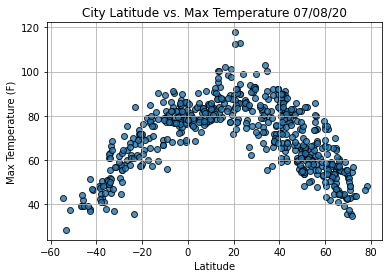

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

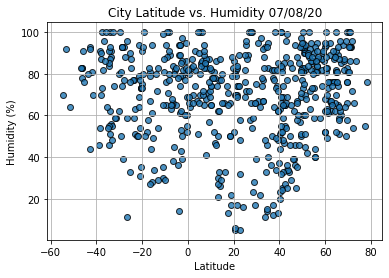

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

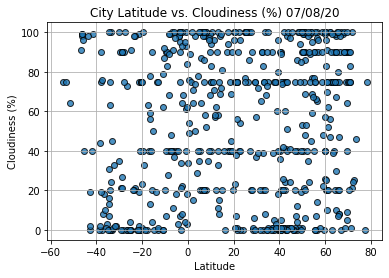

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

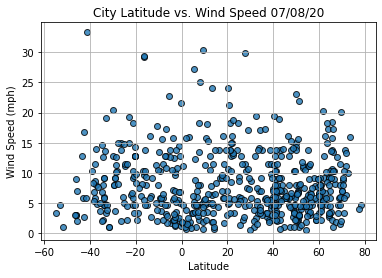

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    print(f"The r-value is: {r_value:.3f}")

In [24]:
index13=city_data_df.loc[13]
index13

City                     Ust-Nera
Country                        RU
Date          2020-07-08 16:33:40
Lat                         64.57
Lng                         143.2
Max Temp                    49.59
Humidity                       70
Cloudiness                     10
Wind Speed                   2.64
Name: 13, dtype: object

In [25]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4      False
       ...  
577     True
578    False
579     True
580    False
581     True
Name: Lat, Length: 582, dtype: bool

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nemuro,JP,2020-07-08 16:33:38,43.32,145.57,59.50,99,98,3.27
1,Ponta Do Sol,PT,2020-07-08 16:33:38,32.67,-17.10,75.00,67,0,2.46
3,Kapaa,US,2020-07-08 16:33:38,22.08,-159.32,78.80,74,90,16.11
5,Klaksvik,FO,2020-07-08 16:33:39,62.23,-6.59,53.60,76,56,12.75
6,Zhuzhou,CN,2020-07-08 16:33:39,27.83,113.15,75.20,100,90,4.47
...,...,...,...,...,...,...,...,...,...
573,Myitkyina,MM,2020-07-08 16:35:19,25.38,97.40,74.53,96,100,1.43
575,Milkovo,RU,2020-07-08 16:35:20,54.72,158.62,58.12,80,67,2.80
577,Duluth,US,2020-07-08 16:34:58,46.78,-92.11,68.00,94,40,12.75
579,Lukovetskiy,RU,2020-07-08 16:35:20,64.30,41.92,69.80,88,75,8.08


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [28]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

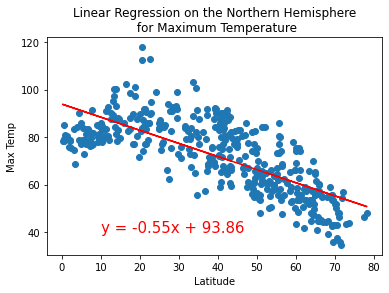

The r-value is: -0.736


In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values,y_values,'Linear Regression on the Northern Hemisphere\n for Maximum Temperature','Max Temp',(10,40))



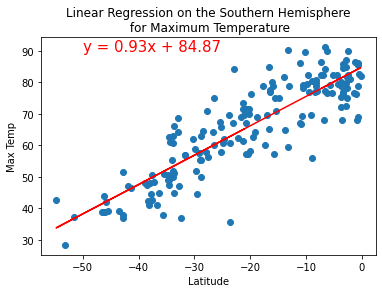

The r-value is: 0.869


In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values,y_values,'Linear Regression on the Southern Hemisphere\n for Maximum Temperature','Max Temp',(-50,90))


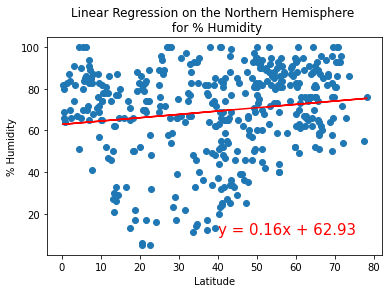

The r-value is: 0.150


In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values,y_values,'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))


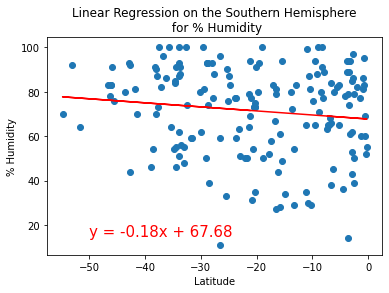

The r-value is: -0.128


In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere\n for % Humidity', '% Humidity',(-50,15))

#The correlation between the latitude and percent humidity is very low because 
#the r-value is less than 0.04 for the Northern and Southern Hemispheres for 
#the plots shown here. This means that percent humidity is unpredictable due to changing 
#weather patterns that can increase or decrease percent humidity. Check the r-values for your plots. 

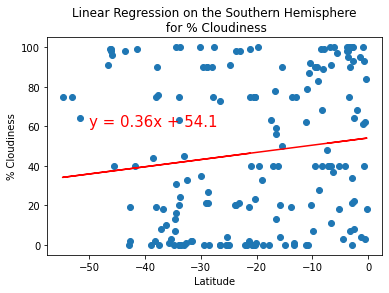

The r-value is: 0.134


In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere\n for % Cloudiness', '% Cloudiness',(-50,60))

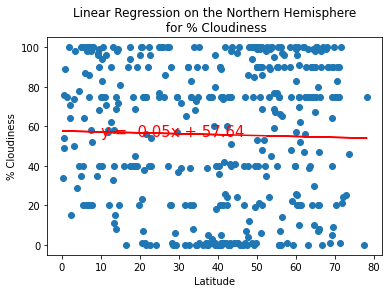

The r-value is: -0.026


In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values,y_values,'Linear Regression on the Northern Hemisphere\n for % Cloudiness','% Cloudiness',(10,55))

#The correlation between the latitude and percent cloudiness is very low because 
#the r-value is less than –0.09 for the Northern Hemisphere and less than –0.02 for the 
#Southern Hemisphere for the plots shown here. This means that cloudiness is unpredictable due 
#to changing weather patterns that can 
#increase or decrease percent cloudiness. Check the r-values for your plots. 

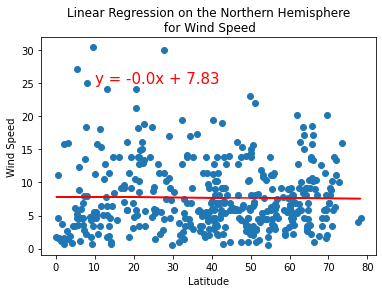

The r-value is: -0.014


In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere\n for Wind Speed','Wind Speed',(10,25))

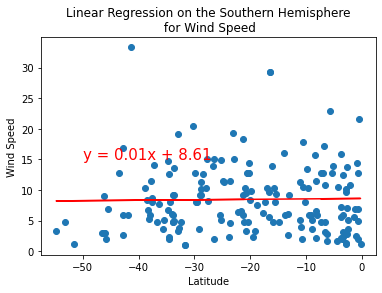

The r-value is: 0.018


In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere\n for Wind Speed','Wind Speed',(-50,15))
